# 附件一预处理（不包括异常值剔除及标准化）

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("Data\\First\\New\\201404081034.xlsx",sheet_name='201404081034')
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,8,10:34:26,59,2,-8,30.0,12.50,DOWN,False,...,-5.39,-0.79,-1.31,-4.15,-2.07,0.0625,机场5,机场68,0.0625,273280
1,4,8,10:34:27,59,1,-8,30.0,12.75,DOWN,False,...,-2.28,-1.44,-2.20,-4.23,-3.56,-0.1250,机场5,机场68,-0.1250,273280
2,4,8,10:34:28,59,0,-8,30.0,13.00,DOWN,False,...,-0.17,-2.34,-4.26,-4.49,-4.38,0.0000,机场5,机场68,0.0000,273280
3,4,8,10:34:29,59,-1,-8,30.0,13.00,DOWN,False,...,-0.43,-3.00,-4.78,-4.58,-4.78,0.0000,机场5,机场68,0.0000,273280
4,4,8,10:34:30,60,-8,-8,30.0,13.25,DOWN,False,...,-1.29,-2.70,-3.77,-4.47,-4.17,-0.0625,机场5,机场68,-0.0625,273280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,4,8,13:29:03,161,11,-8,30.0,2.25,DOWN,False,...,-0.30,0.15,-3.25,-3.39,-3.06,-0.0625,机场5,机场68,-0.0625,251360
10475,4,8,13:29:04,161,7,-8,30.0,2.25,DOWN,False,...,-0.59,-0.37,-3.49,-3.38,-3.50,0.0000,机场5,机场68,0.0000,251360
10476,4,8,13:29:05,161,4,-8,30.0,2.25,DOWN,False,...,-0.44,-0.14,-3.42,-3.30,-3.41,0.0000,机场5,机场68,0.0000,251360
10477,4,8,13:29:06,161,1,-8,30.0,2.25,DOWN,False,...,-0.23,0.10,-3.17,-3.40,-3.05,-0.0625,机场5,机场68,-0.0625,251360


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   月              10479 non-null  int64  
 1   日              10479 non-null  int64  
 2   具体时间           10479 non-null  object 
 3   海拔高度           10479 non-null  int64  
 4   下降率            10479 non-null  int64  
 5   无线电高度          10479 non-null  int64  
 6   计算空速           10479 non-null  float64
 7   地速             10479 non-null  float64
 8   起落架            1575 non-null   object 
 9   空地电门0.2秒       10479 non-null  bool   
 10  空地电门0.4秒       10479 non-null  bool   
 11  空地电门0.6秒       10479 non-null  bool   
 12  空地电门0.8秒       10479 non-null  bool   
 13  空地电门1秒         10479 non-null  bool   
 14  着陆G值0.1秒       10479 non-null  float64
 15  着陆G值0.2秒       10479 non-null  float64
 16  着陆G值0.3秒       10479 non-null  float64
 17  着陆G值0.4秒       10479 non-null  float64
 18  着陆G值0.

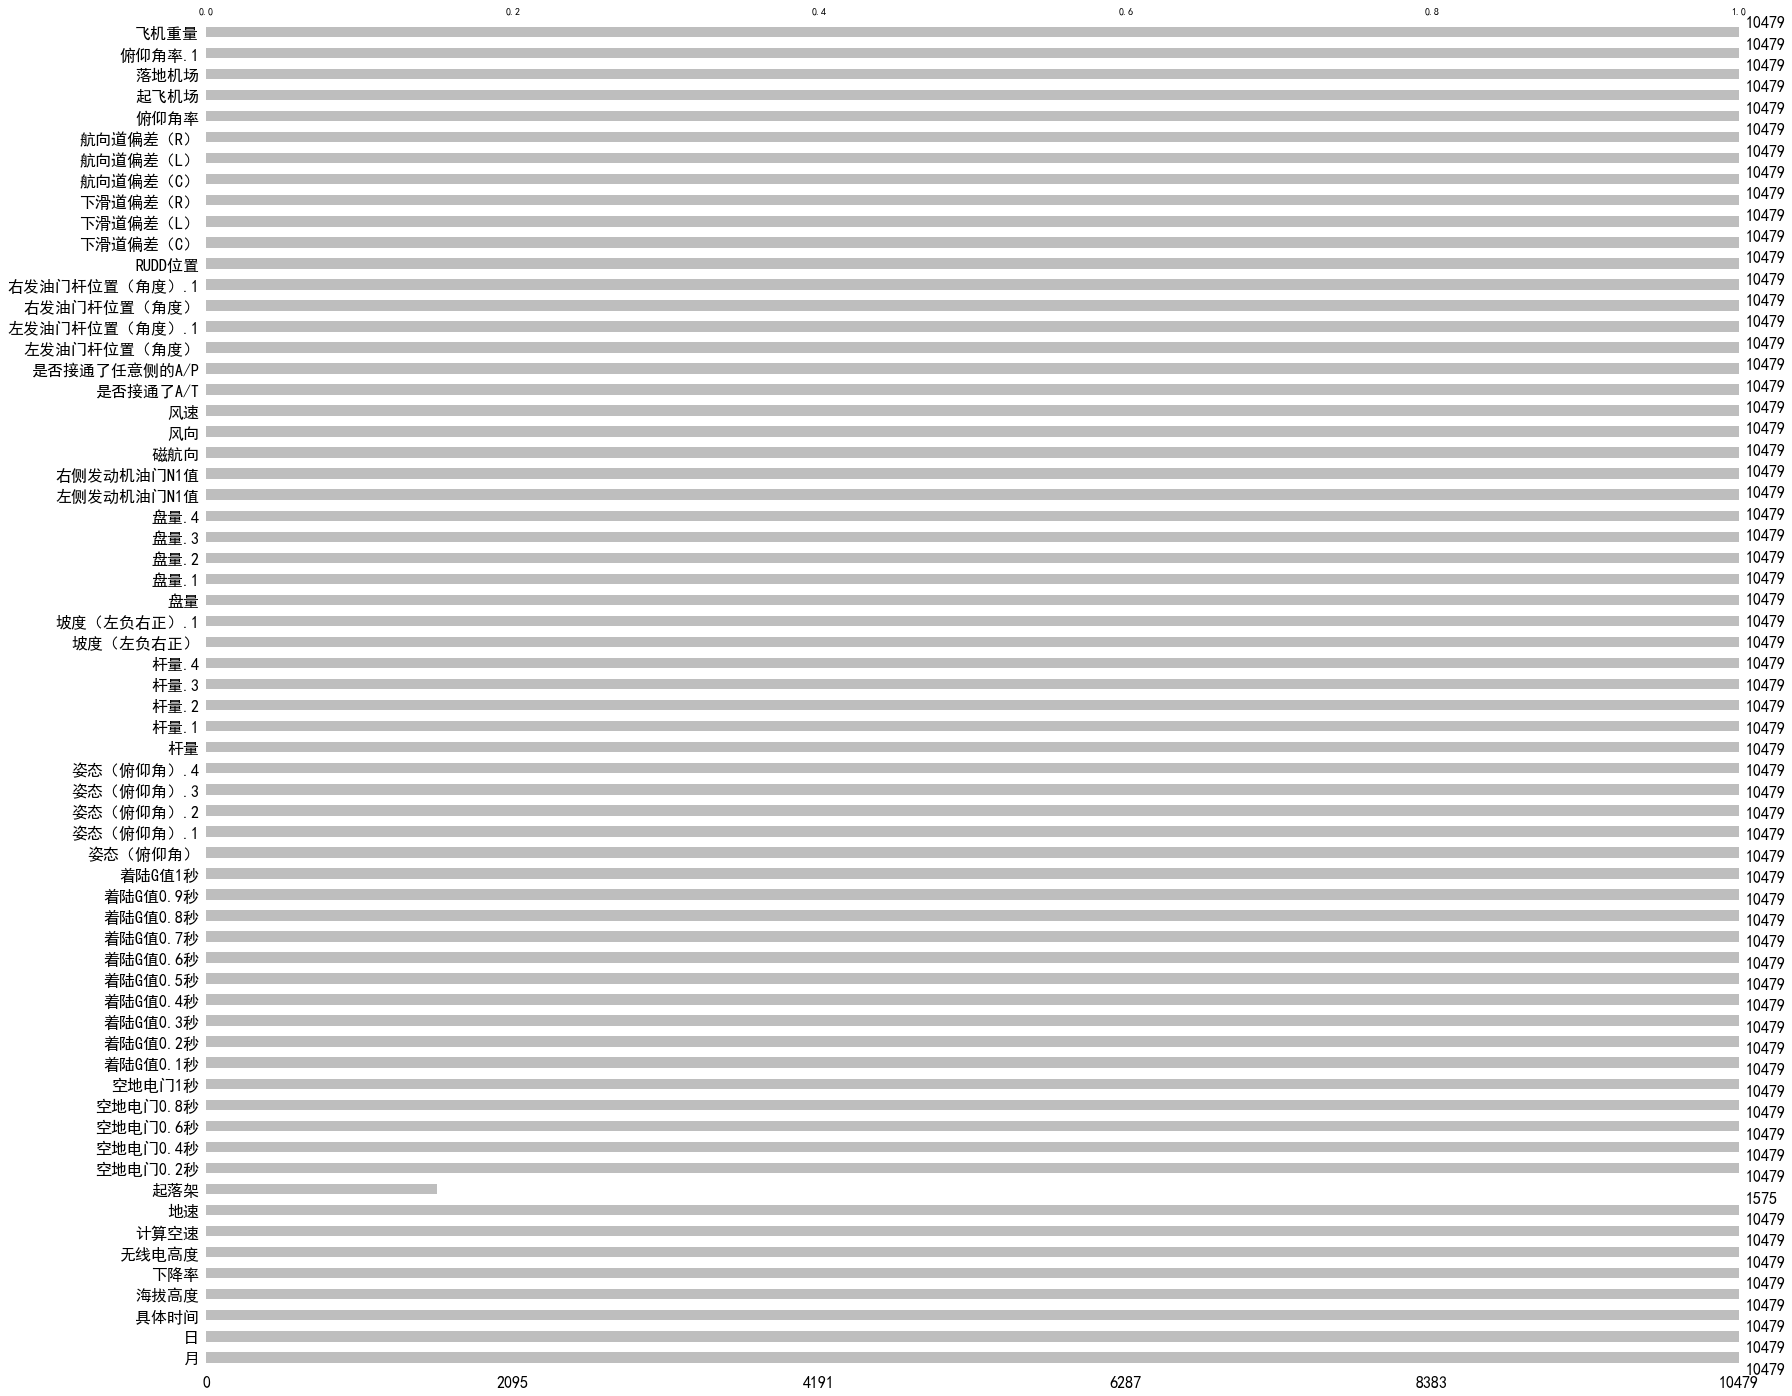

In [4]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(data, color=(190/255,190/255,190/255))
plt.tight_layout()

In [5]:
data.replace({"起落架":{'DOWN':1},
              "空地电门0.2秒":{True:1,False:0},
              "空地电门0.4秒":{True:1,False:0},
              "空地电门0.6秒":{True:1,False:0},
              "空地电门0.8秒":{True:1,False:0},
              "空地电门1秒":{True:1,False:0},
              "是否接通了A/T":{'DISENGD':0,'ENGAGED':1},
              "是否接通了任意侧的A/P":{'OFF':0,'ON':1},
              }, inplace=True)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,8,10:34:26,59,2,-8,30.0,12.50,1.0,0,...,-5.39,-0.79,-1.31,-4.15,-2.07,0.0625,机场5,机场68,0.0625,273280
1,4,8,10:34:27,59,1,-8,30.0,12.75,1.0,0,...,-2.28,-1.44,-2.20,-4.23,-3.56,-0.1250,机场5,机场68,-0.1250,273280
2,4,8,10:34:28,59,0,-8,30.0,13.00,1.0,0,...,-0.17,-2.34,-4.26,-4.49,-4.38,0.0000,机场5,机场68,0.0000,273280
3,4,8,10:34:29,59,-1,-8,30.0,13.00,1.0,0,...,-0.43,-3.00,-4.78,-4.58,-4.78,0.0000,机场5,机场68,0.0000,273280
4,4,8,10:34:30,60,-8,-8,30.0,13.25,1.0,0,...,-1.29,-2.70,-3.77,-4.47,-4.17,-0.0625,机场5,机场68,-0.0625,273280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,4,8,13:29:03,161,11,-8,30.0,2.25,1.0,0,...,-0.30,0.15,-3.25,-3.39,-3.06,-0.0625,机场5,机场68,-0.0625,251360
10475,4,8,13:29:04,161,7,-8,30.0,2.25,1.0,0,...,-0.59,-0.37,-3.49,-3.38,-3.50,0.0000,机场5,机场68,0.0000,251360
10476,4,8,13:29:05,161,4,-8,30.0,2.25,1.0,0,...,-0.44,-0.14,-3.42,-3.30,-3.41,0.0000,机场5,机场68,0.0000,251360
10477,4,8,13:29:06,161,1,-8,30.0,2.25,1.0,0,...,-0.23,0.10,-3.17,-3.40,-3.05,-0.0625,机场5,机场68,-0.0625,251360


In [6]:
data=data.fillna(0)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,8,10:34:26,59,2,-8,30.0,12.50,1.0,0,...,-5.39,-0.79,-1.31,-4.15,-2.07,0.0625,机场5,机场68,0.0625,273280
1,4,8,10:34:27,59,1,-8,30.0,12.75,1.0,0,...,-2.28,-1.44,-2.20,-4.23,-3.56,-0.1250,机场5,机场68,-0.1250,273280
2,4,8,10:34:28,59,0,-8,30.0,13.00,1.0,0,...,-0.17,-2.34,-4.26,-4.49,-4.38,0.0000,机场5,机场68,0.0000,273280
3,4,8,10:34:29,59,-1,-8,30.0,13.00,1.0,0,...,-0.43,-3.00,-4.78,-4.58,-4.78,0.0000,机场5,机场68,0.0000,273280
4,4,8,10:34:30,60,-8,-8,30.0,13.25,1.0,0,...,-1.29,-2.70,-3.77,-4.47,-4.17,-0.0625,机场5,机场68,-0.0625,273280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,4,8,13:29:03,161,11,-8,30.0,2.25,1.0,0,...,-0.30,0.15,-3.25,-3.39,-3.06,-0.0625,机场5,机场68,-0.0625,251360
10475,4,8,13:29:04,161,7,-8,30.0,2.25,1.0,0,...,-0.59,-0.37,-3.49,-3.38,-3.50,0.0000,机场5,机场68,0.0000,251360
10476,4,8,13:29:05,161,4,-8,30.0,2.25,1.0,0,...,-0.44,-0.14,-3.42,-3.30,-3.41,0.0000,机场5,机场68,0.0000,251360
10477,4,8,13:29:06,161,1,-8,30.0,2.25,1.0,0,...,-0.23,0.10,-3.17,-3.40,-3.05,-0.0625,机场5,机场68,-0.0625,251360


In [7]:
data.drop(labels=['月','日','起飞机场','落地机场','飞机重量'],axis=1,inplace=True)
data

,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,10:34:26,59,2,-8,30.0,12.50,1.0,0,0,0,...,34.1895,-0.2617,-4.94,-5.39,-0.79,-1.31,-4.15,-2.07,0.0625,0.0625
1,10:34:27,59,1,-8,30.0,12.75,1.0,0,0,0,...,34.1895,-0.2637,-2.50,-2.28,-1.44,-2.20,-4.23,-3.56,-0.1250,-0.1250
2,10:34:28,59,0,-8,30.0,13.00,1.0,0,0,0,...,34.1895,-0.2637,-0.52,-0.17,-2.34,-4.26,-4.49,-4.38,0.0000,0.0000
3,10:34:29,59,-1,-8,30.0,13.00,1.0,0,0,0,...,34.1895,-0.2656,-0.01,-0.43,-3.00,-4.78,-4.58,-4.78,0.0000,0.0000
4,10:34:30,60,-8,-8,30.0,13.25,1.0,0,0,0,...,34.1895,-0.2656,-1.21,-1.29,-2.70,-3.77,-4.47,-4.17,-0.0625,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,13:29:03,161,11,-8,30.0,2.25,1.0,0,0,0,...,34.1895,-0.2598,-0.27,-0.30,0.15,-3.25,-3.39,-3.06,-0.0625,-0.0625
10475,13:29:04,161,7,-8,30.0,2.25,1.0,0,0,0,...,34.2773,-0.2754,-0.60,-0.59,-0.37,-3.49,-3.38,-3.50,0.0000,0.0000
10476,13:29:05,161,4,-8,30.0,2.25,1.0,0,0,0,...,34.1895,-0.2754,-0.13,-0.44,-0.14,-3.42,-3.30,-3.41,0.0000,0.0000
10477,13:29:06,161,1,-8,30.0,2.25,1.0,0,0,0,...,34.1895,-0.2734,-0.23,-0.23,0.10,-3.17,-3.40,-3.05,-0.0625,-0.0625


# QAR异常判断，剔除

In [8]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup', dup_row)
data[data['is_dup'] == True]

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
1906,True,11:06:13,30739,-1638,1404,309.875,505.00,0.0,1,1,...,71.9824,-0.3105,0.08,0.17,-0.08,-4.61,-4.62,-4.66,0.0000,0.0000
1907,True,11:06:13,30765,-1613,1404,310.000,505.25,0.0,1,1,...,71.9824,-0.3320,0.07,-0.02,0.08,-4.78,-4.69,-4.71,-0.0625,-0.0625
5125,True,11:59:53,33101,-19,1404,298.250,434.75,0.0,1,1,...,56.4697,-0.2402,0.20,0.15,0.00,0.02,-0.04,-0.17,-0.0625,-0.0625
5126,True,11:59:53,33101,-12,1404,298.250,434.75,0.0,1,1,...,56.4697,-0.2402,0.02,-0.08,-0.02,-0.12,-0.07,-0.09,0.0000,0.0000
8366,True,12:53:55,22599,-8,1404,305.125,412.50,0.0,1,1,...,52.7783,-0.2695,-0.37,-0.46,-0.32,1.55,1.17,1.11,0.0000,0.0000
8367,True,12:53:55,22600,-10,1404,305.125,412.50,0.0,1,1,...,52.8223,-0.2715,-0.71,-0.52,-0.53,1.22,1.12,1.10,0.0000,0.0000


In [9]:
data=data.drop_duplicates(subset=['具体时间'],keep='first')
data

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,False,10:34:26,59,2,-8,30.0,12.50,1.0,0,0,...,34.1895,-0.2617,-4.94,-5.39,-0.79,-1.31,-4.15,-2.07,0.0625,0.0625
1,False,10:34:27,59,1,-8,30.0,12.75,1.0,0,0,...,34.1895,-0.2637,-2.50,-2.28,-1.44,-2.20,-4.23,-3.56,-0.1250,-0.1250
2,False,10:34:28,59,0,-8,30.0,13.00,1.0,0,0,...,34.1895,-0.2637,-0.52,-0.17,-2.34,-4.26,-4.49,-4.38,0.0000,0.0000
3,False,10:34:29,59,-1,-8,30.0,13.00,1.0,0,0,...,34.1895,-0.2656,-0.01,-0.43,-3.00,-4.78,-4.58,-4.78,0.0000,0.0000
4,False,10:34:30,60,-8,-8,30.0,13.25,1.0,0,0,...,34.1895,-0.2656,-1.21,-1.29,-2.70,-3.77,-4.47,-4.17,-0.0625,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,False,13:29:03,161,11,-8,30.0,2.25,1.0,0,0,...,34.1895,-0.2598,-0.27,-0.30,0.15,-3.25,-3.39,-3.06,-0.0625,-0.0625
10475,False,13:29:04,161,7,-8,30.0,2.25,1.0,0,0,...,34.2773,-0.2754,-0.60,-0.59,-0.37,-3.49,-3.38,-3.50,0.0000,0.0000
10476,False,13:29:05,161,4,-8,30.0,2.25,1.0,0,0,...,34.1895,-0.2754,-0.13,-0.44,-0.14,-3.42,-3.30,-3.41,0.0000,0.0000
10477,False,13:29:06,161,1,-8,30.0,2.25,1.0,0,0,...,34.1895,-0.2734,-0.23,-0.23,0.10,-3.17,-3.40,-3.05,-0.0625,-0.0625


In [10]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup_N', dup_row)
data[data['is_dup_N'] == True]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1


In [11]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0


data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)
data

D:\TempS\ipykernel_33992\3231745931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)


,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool
0,False,False,10:34:26,59,2,-8,30.0,12.50,1.0,0,...,-0.2617,-4.94,-5.39,-0.79,-1.31,-4.15,-2.07,0.0625,0.0625,1
1,False,False,10:34:27,59,1,-8,30.0,12.75,1.0,0,...,-0.2637,-2.50,-2.28,-1.44,-2.20,-4.23,-3.56,-0.1250,-0.1250,1
2,False,False,10:34:28,59,0,-8,30.0,13.00,1.0,0,...,-0.2637,-0.52,-0.17,-2.34,-4.26,-4.49,-4.38,0.0000,0.0000,1
3,False,False,10:34:29,59,-1,-8,30.0,13.00,1.0,0,...,-0.2656,-0.01,-0.43,-3.00,-4.78,-4.58,-4.78,0.0000,0.0000,1
4,False,False,10:34:30,60,-8,-8,30.0,13.25,1.0,0,...,-0.2656,-1.21,-1.29,-2.70,-3.77,-4.47,-4.17,-0.0625,-0.0625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,False,False,13:29:03,161,11,-8,30.0,2.25,1.0,0,...,-0.2598,-0.27,-0.30,0.15,-3.25,-3.39,-3.06,-0.0625,-0.0625,1
10475,False,False,13:29:04,161,7,-8,30.0,2.25,1.0,0,...,-0.2754,-0.60,-0.59,-0.37,-3.49,-3.38,-3.50,0.0000,0.0000,1
10476,False,False,13:29:05,161,4,-8,30.0,2.25,1.0,0,...,-0.2754,-0.13,-0.44,-0.14,-3.42,-3.30,-3.41,0.0000,0.0000,1
10477,False,False,13:29:06,161,1,-8,30.0,2.25,1.0,0,...,-0.2734,-0.23,-0.23,0.10,-3.17,-3.40,-3.05,-0.0625,-0.0625,1


In [12]:
data[data['bool']==0]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool


In [13]:
data=data.drop(labels=['is_dup','is_dup_N','bool','具体时间','俯仰角率.1'],axis=1)
data

,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,空地电门0.8秒,...,右发油门杆位置（角度）,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率
0,59,2,-8,30.0,12.50,1.0,0,0,0,0,...,34.1895,34.1895,-0.2617,-4.94,-5.39,-0.79,-1.31,-4.15,-2.07,0.0625
1,59,1,-8,30.0,12.75,1.0,0,0,0,0,...,34.1895,34.1895,-0.2637,-2.50,-2.28,-1.44,-2.20,-4.23,-3.56,-0.1250
2,59,0,-8,30.0,13.00,1.0,0,0,0,0,...,34.1895,34.1895,-0.2637,-0.52,-0.17,-2.34,-4.26,-4.49,-4.38,0.0000
3,59,-1,-8,30.0,13.00,1.0,0,0,0,0,...,34.1895,34.1895,-0.2656,-0.01,-0.43,-3.00,-4.78,-4.58,-4.78,0.0000
4,60,-8,-8,30.0,13.25,1.0,0,0,0,0,...,34.1895,34.1895,-0.2656,-1.21,-1.29,-2.70,-3.77,-4.47,-4.17,-0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10474,161,11,-8,30.0,2.25,1.0,0,0,0,0,...,34.1895,34.1895,-0.2598,-0.27,-0.30,0.15,-3.25,-3.39,-3.06,-0.0625
10475,161,7,-8,30.0,2.25,1.0,0,0,0,0,...,34.1895,34.2773,-0.2754,-0.60,-0.59,-0.37,-3.49,-3.38,-3.50,0.0000
10476,161,4,-8,30.0,2.25,1.0,0,0,0,0,...,34.2334,34.1895,-0.2754,-0.13,-0.44,-0.14,-3.42,-3.30,-3.41,0.0000
10477,161,1,-8,30.0,2.25,1.0,0,0,0,0,...,34.1895,34.1895,-0.2734,-0.23,-0.23,0.10,-3.17,-3.40,-3.05,-0.0625
